# Question 1 - PLEASE NOTE I skipped some (a lot) of the steps that we already did in the sharepoint, since I thought graphing the extra graphs was unnecessary if we know the result already 


In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/beatahejno/CS375/main/hw7/bikeshare.csv'
df = pd.read_csv(url) #cnt is the dependent variable
bikeshare = df.drop(['instant','dteday','casual','registered'], axis=1)
bikeshare.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


<BarContainer object of 7 artists>

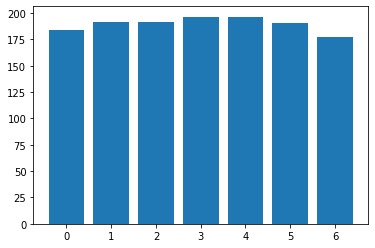

In [ ]:
import matplotlib.pyplot as plt #this is me just playing with the graphs
daycategories = bikeshare['weekday'].unique()
cnt_per_daycategories = bikeshare.groupby('weekday').mean()['cnt']
plt.bar(daycategories, cnt_per_daycategories)

In [ ]:
correlation = bikeshare.corr()
correlation

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.178056
yr,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.250495
mnth,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.120638
hr,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.394071
holiday,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,-0.030927
weekday,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.026900
workingday,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,0.030284
weathersit,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.142426
temp,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.319380,0.039222,0.208096,0.133750,-0.030973,-0.008821,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.400929


In [ ]:
bikeshare_drop = bikeshare.drop(['yr', 'weekday', 'workingday','atemp','windspeed'], axis=1)
print(bikeshare_drop.shape, df.shape)

(17379, 8) (17379, 17)


In [ ]:
bikeshare_drop['season'] = bikeshare_drop['season'].astype('category')
bikeshare_drop['holiday'] = bikeshare_drop['holiday'].astype('category')
bikeshare_drop['weathersit'] = bikeshare_drop['weathersit'].astype('category')
bikeshare_drop['mnth'] = bikeshare_drop['mnth'].astype('category')
bikeshare_drop['hr'] = bikeshare_drop['hr'].astype('category')
bikeshare_dummy = pd.get_dummies(bikeshare_drop, drop_first=True)
bikeshare_dummy

,temp,hum,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,holiday_1,weathersit_2,weathersit_3,weathersit_4
0,0.24,0.81,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.22,0.80,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.22,0.80,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.24,0.75,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.60,119,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
17375,0.26,0.60,89,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
17376,0.26,0.60,90,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
17377,0.26,0.56,61,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as ms
import math
#get data
X = bikeshare_dummy.iloc[:, bikeshare_dummy.columns != 'cnt']
y = bikeshare_dummy.iloc[:, 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=82)
#create regression model
reg = LinearRegression()
reg.fit(X_train, y_train) #fit it to the train data
y_predict = reg.predict(X_test) #predict y based on the test X
#mlr_rmse = math.sqrt(mean_squared_error(y_test, y_predict)) ----------dont need
r_squared = reg.score(X_test, y_test)

r squared:  0.6253919176357787


In [ ]:
print('r squared: ', r_squared) #show R2, the linear regression metric

r squared:  0.6253919176357787
accuracy:  0.004027617951668585
precision:  0.004027617951668585
recall:  0.004027617951668585
f-score:  0.004027617951668585


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


# Question 2

,Customer Name,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


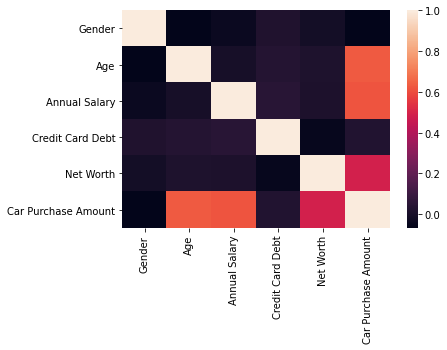

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/beatahejno/CS375/main/hw7/car_purchase.csv'
df = pd.read_csv(url)
carp = df.copy()
import seaborn as sns
sns.heatmap(data=carp.corr())
carp.head()

In [2]:
#plt.scatter(carp['Age'], carp['Annual Salary'], s=2)
#plt.scatter(carp['Age'], carp['Gender'], s=2)
#plt.scatter(carp['Age'], carp['Credit Card Debt'], s=2)
#plt.scatter(carp['Age'], carp['Net Worth'], s=2)
# and tested many more, none showed a strong linear correlation. I'll be keeping all of my columns except the name column
carp_refined = carp.drop(['Customer Name'], axis=1)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as ms
#get data
X = carp_refined.iloc[:, carp_refined.columns != 'Car Purchase Amount']
y = carp_refined.iloc[:, carp_refined.columns == 'Car Purchase Amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=82)
#create regression model
reg = LinearRegression()
reg.fit(X_train, y_train) #fit it to the train data
y_predict = reg.predict(X_test) #predict y based on the test X
r_squared = reg.score(X_test, y_test)

In [4]:
print('r squared: ', r_squared) #show R2, the linear regression metric

r squared:  0.9999999795995962


In [7]:
predict_amount = reg.predict([[0,40,55000,10000,100000]])
print('car purchase amt predicted for the 40 yo female: ',predict_amount)

car purchase amt predicted for the 40 yo female:  [[25341.75792042]]


# Question 3 


,BP,Age,Weight,BSA,Dur,Pulse,Stress
0,105,47,85.4,1.75,5.1,63,33
1,115,49,94.2,2.10,3.8,70,14
2,116,49,95.3,1.98,8.2,72,10
3,117,50,94.7,2.01,5.8,73,99
4,112,51,89.4,1.89,7.0,72,95


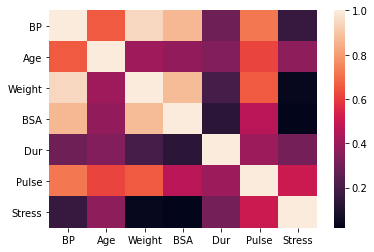

In [20]:
import pandas as pd
url = 'https://raw.githubusercontent.com/beatahejno/CS375/main/hw7/bloodpress.csv'
df = pd.read_csv(url)
blood = df.copy()
import seaborn as sns
sns.heatmap(data=blood.corr())
blood.head()

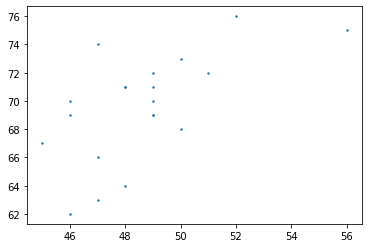

In [21]:
import matplotlib.pyplot as plt #checking collinearity
plt.scatter(blood['Age'], blood['Pulse'], s=2)
#not a very strong linear correlation, I'll keep both columns

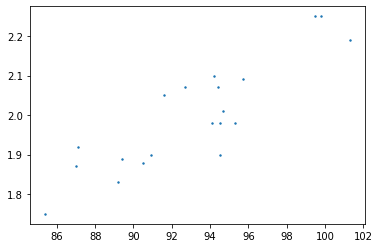

In [26]:
plt.scatter(blood['Weight'], blood['BSA'], s=2)
blood_refined = blood.copy()
blood_refined = blood.drop(['BSA'], axis=1) # I think that's pretty strong linear correlation for these two variables, so I delete one of them

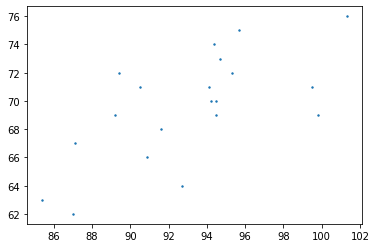

In [27]:
plt.scatter(blood_refined['Weight'], blood_refined['Pulse'], s=2)
#I will not be deleting this column, there's much more variability to this one

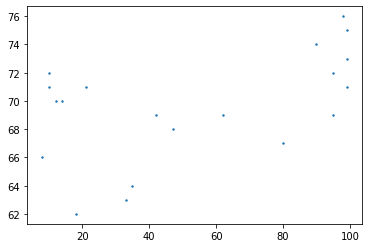

In [28]:
plt.scatter(blood_refined['Stress'], blood_refined['Pulse'], s=2)
#Same here as before. I think I will stop here, the rest of the pairs of indeoendent variables did not show noticeable corr value

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as ms
#get data
X = blood_refined.iloc[:, blood_refined.columns != 'BP']
y = blood_refined.iloc[:, blood_refined.columns == 'BP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=82)
#create regression model
reg = LinearRegression()
reg.fit(X_train, y_train) #fit it to the train data
y_predict = reg.predict(X_test) #predict y based on the test X
r_squared = reg.score(X_test, y_test)

In [31]:
print('r squared: ', r_squared) #show R2, the linear regression metric

r squared:  0.9793688302055535


In [33]:
predict_amount = reg.predict([[55,75,6.0,70,70]])
print('BP predicted for the 55 yo: ',predict_amount)

BP predicted for the 55 yo:  [[99.78483665]]
